In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv("C:/Alabs/Datasets/bankloans - 1657370170610.csv")

In [3]:
loans.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
loans.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [5]:
loans.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [6]:
loans.isna().sum()/loans.shape[0]

age         0.000000
ed          0.000000
employ      0.000000
address     0.000000
income      0.000000
debtinc     0.000000
creddebt    0.000000
othdebt     0.000000
default     0.176471
dtype: float64

In [7]:
loans_exist = loans.loc[loans.default.notna()]

In [8]:
loans_new = loans.loc[loans.default.isna()]

In [9]:
loans_new

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [10]:
loans_exist.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [11]:
x_var = loans_exist.columns.difference(['default'])
y_var = ['default']

In [12]:
x_var

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [13]:
y_var

['default']

In [14]:
X = loans_exist[x_var]
X

,address,age,creddebt,debtinc,ed,employ,income,othdebt
0,12,41,11.359392,9.3,3,17,176,5.008608
1,6,27,1.362202,17.3,1,10,31,4.000798
2,14,40,0.856075,5.5,1,15,55,2.168925
3,14,41,2.658720,2.9,1,15,120,0.821280
4,0,24,1.787436,17.3,2,2,28,3.056564
...,...,...,...,...,...,...,...,...
695,15,36,0.262062,4.6,2,6,27,0.979938
696,4,29,0.369495,11.5,2,6,21,2.045505
697,3,33,0.491264,7.6,1,15,32,1.940736
698,22,45,2.302608,8.4,1,19,77,4.165392


In [15]:
Y = loans_exist[y_var]
Y


,default
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
695,1.0
696,0.0
697,0.0
698,0.0


In [16]:
Y.value_counts()

default
0.0        517
1.0        183
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state= 34)
print(x_train.shape, x_test.shape)

(469, 8) (231, 8)


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std = StandardScaler()
std.fit(X= x_train)
std.transform(X= x_train)
std.transform(X= x_test)

array([[ 0.53747073,  0.12152763, -0.52434288, ...,  0.36013055,
        -0.07688909,  0.96833749],
       [-0.04334441, -0.5131768 , -0.66172512, ...,  0.36013055,
        -0.55302437, -0.28707001],
       [ 0.24706316, -0.13235414, -0.3470024 , ...,  1.388225  ,
         0.14864868,  0.54951193],
       ...,
       [ 0.68267451,  0.75623205, -0.52847998, ...,  0.06638928,
        -0.00170983, -0.35844992],
       [ 0.24706316, -0.25929503, -0.55559619, ...,  0.06638928,
        -0.47784511, -0.70905333],
       [ 0.97308208,  0.12152763, -0.49091795, ..., -0.66796389,
        -0.75350238, -0.1945577 ]])

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
train_pred = dt_clf.predict(x_train)
test_pred = dt_clf.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score


train_accuracy = accuracy_score(train_pred, y_train)
test_accuracy = accuracy_score(test_pred, y_test)
print(train_accuracy, test_accuracy)



1.0 0.7359307359307359


In [24]:
def accur_score(model, x_train= x_train, x_test = x_test, y_train= y_train, y_test = y_test):
    dt_clf.fit(x_train, y_train)
    train_pred = dt_clf.predict(x_train)
    test_pred = dt_clf.predict(x_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred) 
    cv_score = cross_val_score(model, x_train, y_train, cv = 6)    


    print('tr_acc :', train_accuracy, 'ts_acc :', test_accuracy, 'cv_score:', cv_score)


In [25]:
model = DecisionTreeClassifier(criterion= 'entropy')
accur_score(model)

tr_acc : 1.0 ts_acc : 0.7402597402597403 cv_score: [0.69620253 0.75641026 0.70512821 0.70512821 0.74358974 0.73076923]


In [26]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 30, min_samples_split= 30)


In [27]:
accur_score(model)

tr_acc : 1.0 ts_acc : 0.7402597402597403 cv_score: [0.75949367 0.78205128 0.67948718 0.73076923 0.69230769 0.75641026]


In [28]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators= 10, max_depth= 5)
rfc.fit(x_train, y_train.values.ravel())
accur_score( rfc)

c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

tr_acc : 1.0 ts_acc : 0.7229437229437229 cv_score: [0.74683544 0.83333333 0.75641026 0.76923077 0.66666667 0.76923077]


In [29]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
    'n_estimators': list(range(1, 11, 1)),
    'max_depth' : list(range(1, 10, 1)),
}
clf_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10)
clf_grid.fit(X, Y)

c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [30]:
clf_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=8)

In [31]:
clf_grid.best_score_

0.7928571428571428

In [32]:
pd.DataFrame(clf_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006301,0.008763,0.010358,0.012838,1,1,"{'max_depth': 1, 'n_estimators': 1}",0.714286,0.728571,0.728571,0.757143,0.757143,0.742857,0.742857,0.742857,0.742857,0.742857,0.740000,0.012454,77
1,0.013359,0.007433,0.002334,0.003912,1,2,"{'max_depth': 1, 'n_estimators': 2}",0.714286,0.685714,0.742857,0.742857,0.742857,0.742857,0.742857,0.742857,0.742857,0.742857,0.734286,0.018295,84
2,0.009368,0.006614,0.001768,0.003906,1,3,"{'max_depth': 1, 'n_estimators': 3}",0.728571,0.728571,0.728571,0.742857,0.742857,0.742857,0.771429,0.742857,0.728571,0.757143,0.741429,0.013477,75
3,0.009419,0.006816,0.003134,0.006268,1,4,"{'max_depth': 1, 'n_estimators': 4}",0.728571,0.728571,0.728571,0.742857,0.742857,0.742857,0.742857,0.757143,0.742857,0.742857,0.740000,0.008571,77
4,0.015716,0.008134,0.002120,0.004817,1,5,"{'max_depth': 1, 'n_estimators': 5}",0.728571,0.714286,0.728571,0.757143,0.742857,0.742857,0.742857,0.742857,0.742857,0.742857,0.738571,0.011157,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.016686,0.003071,0.003161,0.005430,9,6,"{'max_depth': 9, 'n_estimators': 6}",0.742857,0.742857,0.757143,0.757143,0.814286,0.757143,0.757143,0.800000,0.871429,0.757143,0.775714,0.038888,19
86,0.018573,0.009054,0.005968,0.006832,9,7,"{'max_depth': 9, 'n_estimators': 7}",0.771429,0.728571,0.714286,0.800000,0.785714,0.757143,0.785714,0.828571,0.900000,0.785714,0.785714,0.049487,6
87,0.018532,0.005476,0.005500,0.006923,9,8,"{'max_depth': 9, 'n_estimators': 8}",0.728571,0.728571,0.757143,0.757143,0.714286,0.871429,0.742857,0.728571,0.814286,0.800000,0.764286,0.047056,45
88,0.023049,0.005422,0.003742,0.004333,9,9,"{'max_depth': 9, 'n_estimators': 9}",0.757143,0.742857,0.685714,0.771429,0.814286,0.785714,0.728571,0.800000,0.871429,0.800000,0.775714,0.048676,19


In [33]:
final_model = clf_grid.best_estimator_

In [34]:
cross_val_score(final_model, X, Y, cv = 5).mean()

c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\kroop\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

0.7799999999999999

In [35]:
dt_clf.feature_names_in_

array(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'], dtype=object)

In [36]:
dt_clf.feature_importances_

array([0.09689614, 0.11063995, 0.24402833, 0.22715898, 0.01787684,
       0.16028466, 0.04548553, 0.09762956])

In [37]:
feat_imp = pd.DataFrame({'feature' : dt_clf.feature_names_in_, 
              'importance' : dt_clf.feature_importances_})

feat_imp

,feature,importance
0,address,0.096896
1,age,0.110640
2,creddebt,0.244028
3,debtinc,0.227159
4,ed,0.017877
5,employ,0.160285
6,income,0.045486
7,othdebt,0.097630


In [41]:
feat_imp =  feat_imp.sort_values(by = 'importance', ascending= False)
feat_imp

,feature,importance
2,creddebt,0.244028
3,debtinc,0.227159
5,employ,0.160285
1,age,0.110640
7,othdebt,0.097630
0,address,0.096896
6,income,0.045486
4,ed,0.017877


<Axes: >

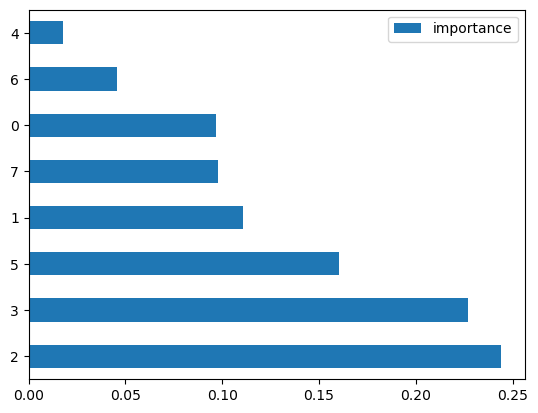

In [42]:
feat_imp.plot(kind = 'barh')

In [43]:
rfc.feature_importances_

array([0.08996029, 0.07618107, 0.2695773 , 0.17460449, 0.03429853,
       0.18874408, 0.09353571, 0.07309853])

In [44]:
rfc.feature_names_in_

array(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'], dtype=object)

In [47]:
 feat_imp_rfc =   pd.DataFrame({'feature': rfc.feature_names_in_, 
    'importance': rfc.feature_importances_})

In [50]:
feat_imp_rfc = feat_imp_rfc.sort_values(by = 'importance', ascending = False)
feat_imp_rfc

,feature,importance
2,creddebt,0.269577
5,employ,0.188744
3,debtinc,0.174604
6,income,0.093536
0,address,0.089960
1,age,0.076181
7,othdebt,0.073099
4,ed,0.034299


<Axes: >

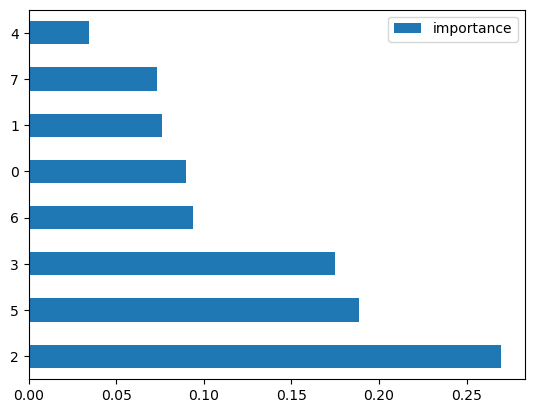

In [51]:
feat_imp_rfc.plot(kind = 'barh')